In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("./data/generator.csv")
df.head()

,ID,RPM,VIBRATION,STATUS
0,1,568,585,good
1,2,586,565,good
2,3,609,536,good
3,4,616,492,good
4,5,632,465,good


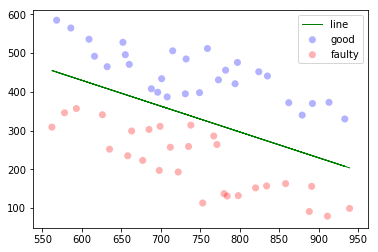

In [3]:
fig, ax = plt.subplots()

color = ["blue", "red"]
status = ["good", "faulty"]
for i in range(2):
    x = df[df["STATUS"] == status[i]]["RPM"]
    y = df[df["STATUS"] == status[i]]["VIBRATION"]
    ax.scatter(x, y, c=color[i], s=50, label=status[i],
                   alpha=0.3, edgecolors='none')


x_line =  df["RPM"]
y_line =  830 - 0.667 * df["RPM"]
ax.plot(x_line, y_line, linestyle="-", color="green", linewidth=1, label="line")


ax.legend()

plt.show()

In [4]:
x_data = df.iloc[:, 1:3].as_matrix()

from sklearn import preprocessing
le = preprocessing.LabelEncoder()
y_label = df.iloc[:, 3].as_matrix()
le.fit(np.unique(y_label))
y_data = le.transform(y_label)

x_data[:3], y_data[:3]

NameError: name 'np' is not defined

In [ ]:
from sklearn import linear_model

regr = linear_model.LinearRegression()
regr.fit(x_data, y_data)

In [ ]:
regr.predict(x_data)

In [ ]:
fig, ax = plt.subplots()

color = ["blue", "red"]
status = ["good", "faulty"]
for i in range(2):
    x = df[df["STATUS"] == status[i]]["RPM"]
    y = df[df["STATUS"] == status[i]]["VIBRATION"]
    ax.scatter(x, y, c=color[i], s=50, label=status[i],
                   alpha=0.3, edgecolors='none')


x_line = x_data[:, 0]
y_line = -1 * (regr.intercept_ + regr.coef_[0] *  x_data[:,0]) / regr.coef_[1]
ax.plot(x_line, y_line, color="green", linewidth=1, label="line")


ax.legend()

plt.show()